## EE399 HW1
## Hao Lin
## (i)

In [2]:
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as opt
import matplotlib.pyplot as plt

X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/len(x))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])


print("Minimum error:", res.fun)
print("A:", res.x[0])
print("B:", res.x[1])
print("C:", res.x[2])
print("D:", res.x[3])

Minimum error: 1.592725853040056
A: 2.1716818723637914
B: 0.9093249029166655
C: 0.7324784894461773
D: 31.45291849616531


# （ii）

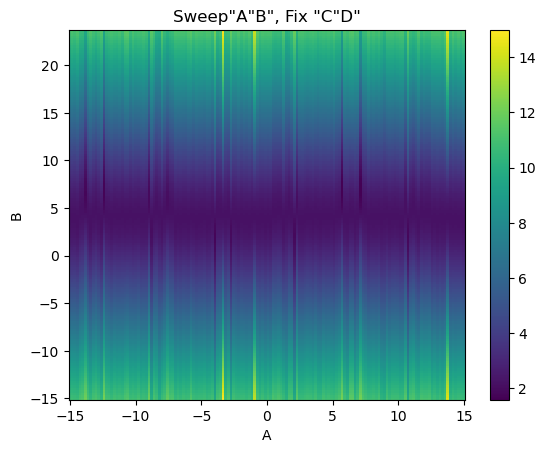

In [3]:
A_vals = np.linspace(-15, 15,150)
B_vals = np.linspace(-15, 15 * np.pi/2,150)
C = c[2]
D = c[3]

error_grid = np.zeros((len(A_vals), len(B_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(A_vals)):
    for j in range(len(B_vals)):
        params = [A_vals[i], B_vals[j], C, D]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(A_vals, B_vals, error_grid)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('B')
plt.title('Sweep"A"B", Fix "C"D"')
plt.show()

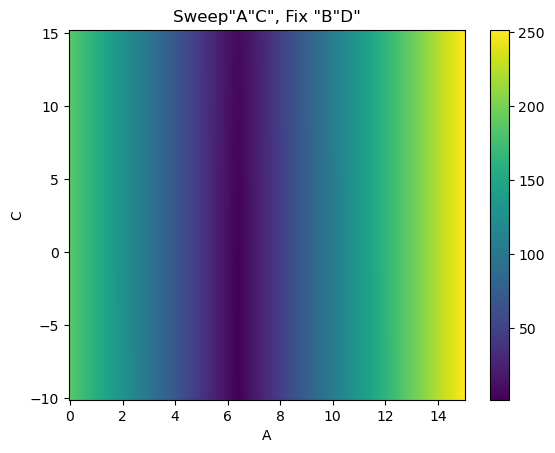

In [4]:
A_vals = np.linspace(0, 15,150)
C_vals = np.linspace(-10, 15.1, 150)
B = c[1]
D = c[3]

error_grid = np.zeros((len(A_vals), len(C_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(A_vals)):
    for j in range(len(C_vals)):
        params = [A_vals[i], B, C_vals[j], D]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(A_vals, C_vals, error_grid)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('C')
plt.title('Sweep"A"C", Fix "B"D"')
plt.show()

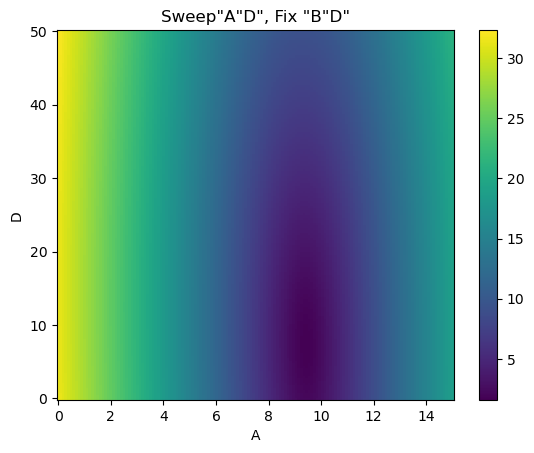

In [5]:
A_vals = np.linspace(0, 15,150)
D_vals = np.linspace(0, 50, 150)
B = c[1]
C = c[2]


error_grid = np.zeros((len(A_vals), len(D_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(A_vals)):
    for j in range(len(D_vals)):
        params = [A_vals[i], B, C, D_vals[j]]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(A_vals, D_vals, error_grid)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('D')
plt.title('Sweep"A"D", Fix "B"D"')
plt.show()

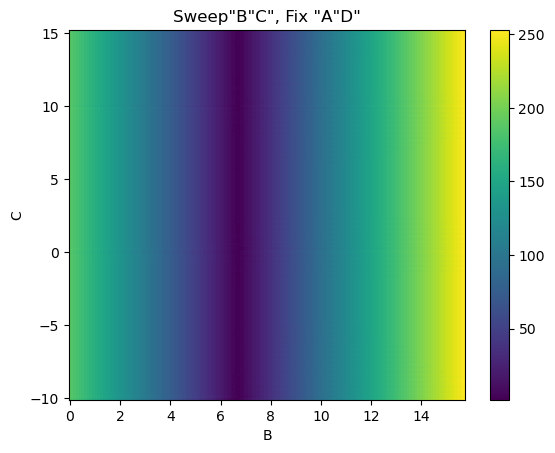

In [6]:

B_vals = np.linspace(0, 10 * np.pi/2,150)
C_vals = np.linspace(-10, 15.1, 150)
A = c[0]
D = c[3]

error_grid = np.zeros((len(B_vals), len(C_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(A_vals)):
    for j in range(len(D_vals)):
        params = [A, B_vals[i], C_vals[j], D]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(B_vals, C_vals, error_grid)
plt.colorbar()
plt.xlabel('B')
plt.ylabel('C')
plt.title('Sweep"B"C", Fix "A"D"')
plt.show()

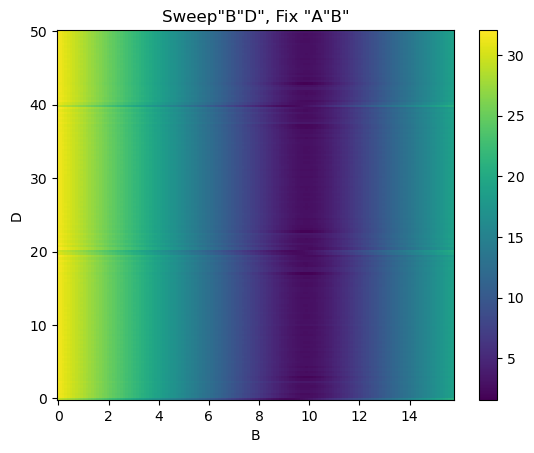

In [8]:
B_vals = np.linspace(0, 10 * np.pi/2,150)
D_vals = np.linspace(0, 50, 150)
A = c[0]
C = c[2]


error_grid = np.zeros((len(B_vals), len(D_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(A_vals)):
    for j in range(len(D_vals)):
        params = [A, B_vals[i], C, D_vals[j]]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(B_vals, D_vals, error_grid)
plt.colorbar()
plt.xlabel('B')
plt.ylabel('D')
plt.title('Sweep"B"D", Fix "A"B"')
plt.show()

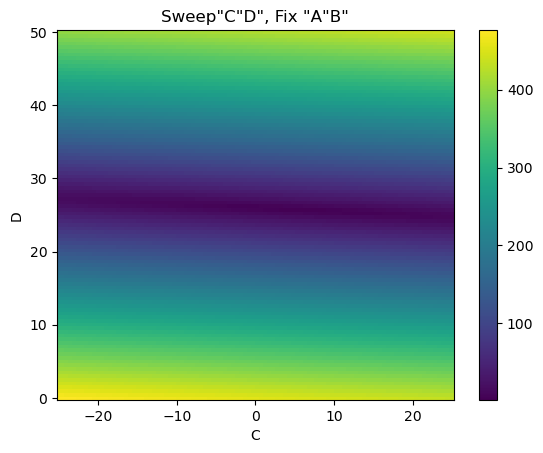

In [7]:
C_vals = np.linspace(-25, 25, 100)
D_vals = np.linspace(0, 50, 100)
A = c[0]
B = c[1]


error_grid = np.zeros((len(C_vals), len(D_vals)))

# Sweep through the parameters and calculate the error for each combination
for i in range(len(C_vals)):
    for j in range(len(D_vals)):
        params = [A, B, C_vals[i], D_vals[j]]
        error_grid[i,j] = velfit(params, X, Y)

# Plot heatmap
plt.pcolor(C_vals, D_vals, error_grid)
plt.colorbar()
plt.xlabel('C')
plt.ylabel('D')
plt.title('Sweep"C"D", Fix "A"B"')
plt.show()

# (iii)

C:\Users\Linha\.android\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Model			Training Error		Test Error
Line			100.60			124.45
Parabola		90.36			835.21
19th Degree Poly	0.02			9008733518737301307392.00


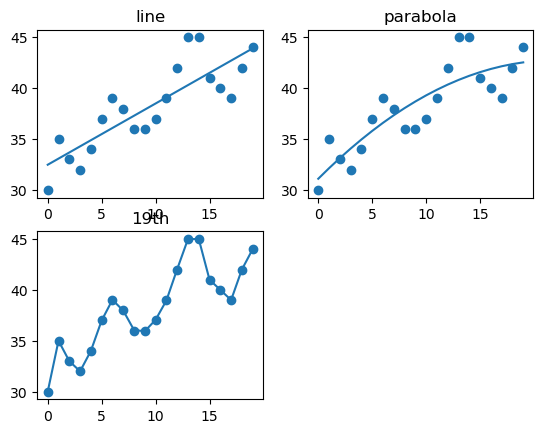

In [18]:
X_train = X[:20]
Y_train =  Y[:20]
X_test =  X[20:]
Y_test =  Y[20:]

# Fit a line to the training data
p1 = np.polyfit(X_train, Y_train, 1)
line_train = np.polyval(p1, X_train)
line_error_train = np.sum((line_train - Y_train) ** 2)
line_error_test = np.sum((np.polyval(p1, X_test) - Y_test) ** 2)

# Fit a parabola to the training data
p2 = np.polyfit(X_train, Y_train, 2)
parabola_train = np.polyval(p2, X_train)
parabola_error_train = np.sum((parabola_train - Y_train) ** 2)
parabola_error_test = np.sum((np.polyval(p2, X_test) - Y_test) ** 2)

# Fit a 19th degree polynomial to the training data
p19 = np.polyfit(X_train, Y_train, 19)
poly19_train = np.polyval(p19, X_train)
poly19_error_train = np.sum((poly19_train - Y_train) ** 2)
poly19_error_test = np.sum((np.polyval(p19, X_test) - Y_test) ** 2)

# Print the results
print("Model\t\t\tTraining Error\t\tTest Error")
print("Line\t\t\t{:.2f}\t\t\t{:.2f}".format(line_error_train, line_error_test))
print("Parabola\t\t{:.2f}\t\t\t{:.2f}".format(parabola_error_train, parabola_error_test))
print("19th Degree Poly\t{:.2f}\t\t\t{:.2f}".format(poly19_error_train, poly19_error_test))

plt.figure()
plt.subplot(221)
plt.scatter(X_train, Y_train)
plt.plot(X_train, line_train)
plt.title('line')

plt.subplot(222)
plt.scatter(X_train, Y_train)
plt.plot(X_train, parabola_train)
plt.title('parabola')

plt.subplot(223)
plt.scatter(X_train, Y_train)
plt.plot(X_train, poly19_train)
plt.title('19th')

plt.show()

# (IV)

C:\Users\Linha\.android\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Model   | Training Error | Test Error
---------------------------------------
Line    | 68.57        | 86.45
Parabola| 68.51        | 84.44
19-degree Poly | 0.54      | 2575233.30


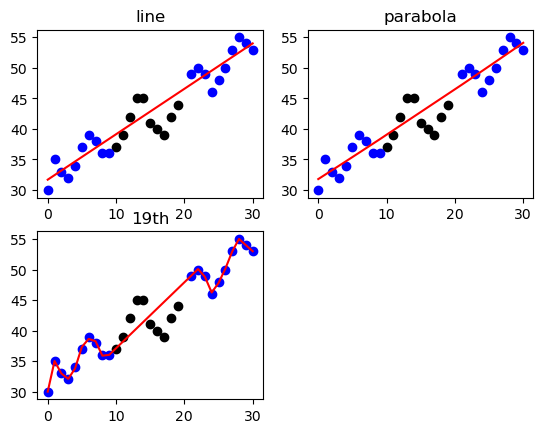

In [23]:
X_train = np.concatenate((X[:10], X[-10:]))
X_test = X[10:20]
Y_train = np.concatenate((Y[:10], Y[-10:]))
Y_test = Y[10:20]

# Fit a line
p_line_train = np.polyfit(X_train, Y_train, 1)
f_line_train = np.poly1d(p_line_train)
fit_line_train = np.polyval(p_line_train, X_train)

# Fit a parabola
p_parabola_train = np.polyfit(X_train, Y_train, 2)
f_parabola_train = np.poly1d(p_parabola_train)
fit_parabola_train = np.polyval(p_parabola_train, X_train)

# Fit a 19th degree polynomial
p_poly_train = np.polyfit(X_train, Y_train, 19)
f_poly_train = np.poly1d(p_poly_train)
fit_poly_train = np.polyval(p_poly_train, X_train)

# Compute least square error for each model on test data
error_line_test = np.sum(np.square(f_line_train(X_test) - Y_test))
error_parabola_test = np.sum(np.square(f_parabola_train(X_test) - Y_test))
error_poly_test = np.sum(np.square(f_poly_train(X_test) - Y_test))

# Compute least square error for each model on training data
error_line_train = np.sum(np.square(f_line_train(X_train) - Y_train))
error_parabola_train = np.sum(np.square(f_parabola_train(X_train) - Y_train))
error_poly_train = np.sum(np.square(f_poly_train(X_train) - Y_train))

print("Model   | Training Error | Test Error")
print("---------------------------------------")
print(f"Line    | {error_line_train:.2f}        | {error_line_test:.2f}")
print(f"Parabola| {error_parabola_train:.2f}        | {error_parabola_test:.2f}")
print(f"19-degree Poly | {error_poly_train:.2f}      | {error_poly_test:.2f}")

plt.figure()
plt.subplot(221)
plt.plot(X_test, Y_test, 'ko')
plt.plot(X_train, Y_train , 'bo')
plt.plot(X_train, fit_line_train , 'r-')
plt.title('line')

plt.subplot(222)
plt.plot(X_test, Y_test, 'ko')
plt.plot(X_train, Y_train , 'bo')
plt.plot(X_train, fit_parabola_train , 'r-')
plt.title('parabola')

plt.subplot(223)
plt.plot(X_test, Y_test, 'ko')
plt.plot(X_train, Y_train , 'bo')
plt.plot(X_train, fit_poly_train , 'r-')
plt.title('19th')
plt.show()
